In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def f(x,y):
    "Objective function"
    #return (x-3.14)*2 + (y-2.72)*2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    f1=x+2*-y+3
    f2=2*x+y-8
    z = f1**2+f2**2
    return z

In [4]:
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

In [5]:
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
N_Iterations=100 
GBest_convergence=np.zeros(N_Iterations+1)
n_particles = 50

In [6]:
# Create particles
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5 # initialize new positions
V = np.random.randn(2, n_particles) * 0.1 # initialize new velocities

In [7]:
# Initialize data
pbest = X # position
pbest_obj = f(X[0], X[1]) # fitness/objective value
gbest = pbest[:, pbest_obj.argmin()] # position
gbest_obj = pbest_obj.min() # fitness/objective value
GBest_convergence[0]=gbest_obj

In [8]:
for iter in range(N_Iterations): 
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V # to generate new positions
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
    GBest_convergence[iter+1]=gbest_obj
    print('The best solution is:' + str(gbest_obj))

The best solution is:0.44545688247947735
The best solution is:0.275323901831266
The best solution is:0.18709073028263992
The best solution is:0.14714304934450284
The best solution is:0.13479377262648232
The best solution is:0.13479377262648232
The best solution is:0.13479377262648232
The best solution is:0.07614149354370482
The best solution is:0.020004056275239122
The best solution is:0.012796456045580757
The best solution is:0.0036608136206168007
The best solution is:0.0031282127189576716
The best solution is:0.0031282127189576716
The best solution is:0.0031282127189576716
The best solution is:0.0010133062981043301
The best solution is:0.0010133062981043301
The best solution is:0.0010133062981043301
The best solution is:0.0010133062981043301
The best solution is:0.0010133062981043301
The best solution is:0.0008466769623954983
The best solution is:3.360640645487347e-05
The best solution is:3.360640645487347e-05
The best solution is:3.360640645487347e-05
The best solution is:3.36064064

PSO found best solution at f([2.59999984 2.80000007])=1.5720167563057614e-13
Global optimal at f([2.5757575757575757, 2.7777777777777777])=0.005407611468217568


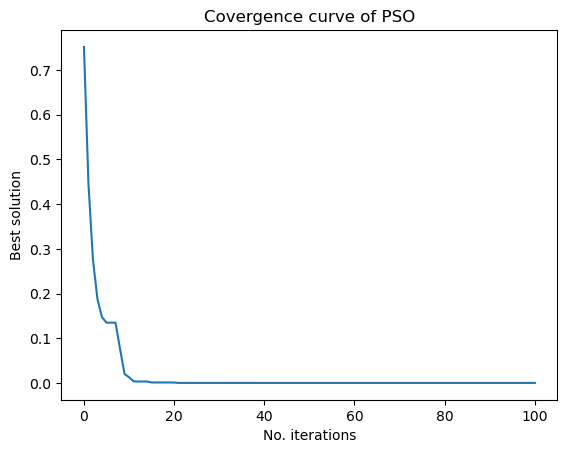

In [9]:
# Show results
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

# Plotting the convergence Graph
idx=[i for i in range(N_Iterations+1)]
plt.plot(idx, GBest_convergence)
plt.title("Covergence curve of PSO")
plt.xlabel("No. iterations")
plt.ylabel("Best solution")
plt.show()